<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/Activity_Build_a_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: Build a decision tree to predict customer satisfaction for an airline company

<p align="center"><img src="https://cdn.shopify.com/s/files/1/0657/3100/2634/files/Papier_peint_avion_Decollage_en_style_pop_art_et_colore.jpg?v=1712910949" >


**Author**: André Marinho

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience.

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [ ]:
### YOUR CODE HERE ###

# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###

df = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows of data

In [ ]:
df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes:

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data.

In [ ]:
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Output unique values

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column.

In [ ]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels.

In [ ]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [ ]:
(df['satisfaction'].value_counts()/df.shape[0] * 100)

satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64

**Question:** How many satisfied and dissatisfied customers were there?

As can be seen, the customers are more satisfied than dissatisfied with the services of the airline company. Furthermore, the dataset is balanced, as there is only a 10% difference between the classes.

**Question:** What percentage of customers were satisfied?

The satisfied customers represent almost 55% of the dataset.

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data.

In [ ]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

**Question:** Why is it important to check how many rows and columns there are in the dataset?

It's important to be aware of the size of the data and how much effort it will require to make the transformations and build an effective model.

### Check the number of rows and columns in the dataset

In [ ]:
df.shape

(129880, 22)

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [ ]:
df_subset = df.dropna(axis=0).reset_index(drop = True)

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [ ]:
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [ ]:
df_subset.shape

(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric.

In [ ]:
df_subset['Class'] = df_subset['Class'].map({'Eco': 1, 'Eco Plus': 2, 'Business': 3})

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column.

In [ ]:
### YOUR CODE HERE ###
df_subset['satisfaction'] = df_subset['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [ ]:
### YOUR CODE HERE ###

df_subset = pd.get_dummies(df_subset, drop_first = True)

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [ ]:
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer        uint8
Type of Travel_Personal Travel         uint8
dtype: obj

In [ ]:
df_subset.head()

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,...,3,0,3,5,3,2,0,0.0,0,1
1,1,47,3,2464,0,0,0,3,0,2,...,4,4,4,2,3,2,310,305.0,0,1
2,1,15,1,2138,0,0,0,3,2,0,...,3,3,4,4,4,2,0,0.0,0,1
3,1,60,1,623,0,0,0,3,3,4,...,1,0,1,4,1,3,0,0.0,0,1
4,1,70,1,354,0,0,0,3,4,3,...,2,0,2,4,2,5,0,0.0,0,1


### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set.

In [ ]:
y = df_subset['satisfaction']

X = df_subset.copy()
X = X.drop('satisfaction', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25, stratify = y,
                                                   random_state = 42)

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`.

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

df_pred = decision_tree.predict(X_test)

**Question:** What are some advantages of using decision trees versus other models you have learned about?

Unlike the other models, decision trees require relatively few pre-processing steps. Furthermore, they do not require normalization or scaling, and the decisions are transparent.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [ ]:
print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, df_pred))
print("Precision:", "%.3f" % metrics.precision_score(y_test, df_pred))
print("Recall:", "%.3f" % metrics.recall_score(y_test, df_pred))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, df_pred))

Accuracy: 0.933
Precision: 0.937
Recall: 0.941
F1 Score: 0.939


**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

An interesting additional step is to tune the decision tree, by tuning the hyperparameters and conducting cross-validation. It is important to control how a decision tree grows and make more efficient use of the training data.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

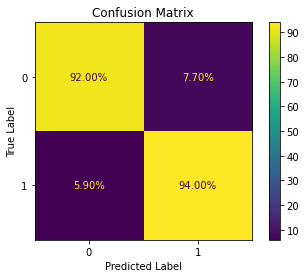

In [ ]:
def conf_matrix_plot_percentage(model, x_data, y_data):
    '''
    Accepts a model object, X data (test or validate), and y data (test or validate).
    Returns a plot of the confusion matrix with percentages for predictions on y data, including the % symbol.
    '''
    # Predict the labels
    model_pred = model.predict(x_data)

    # Compute the confusion matrix
    cm = metrics.confusion_matrix(y_data, model_pred, labels=model.classes_)

    # Normalize the confusion matrix by row (to show percentages per class)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create a confusion matrix display
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_percentage,
                                  display_labels=model.classes_)

    # Plot the confusion matrix
    disp.plot()

    # Customize text to add the '%' symbol
    for i, text in enumerate(disp.text_.ravel()):
        value = float(text.get_text())
        text.set_text(f"{value:.2f}%")  # Format with percentage symbol

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# Create the display for your confusion matrix.

conf_matrix_plot_percentage(decision_tree, X_test, y_test)


# Plot the visual in-line.

plt.show()

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

The model demonstrates strong performance in predicting customer satisfaction. It accurately predicted 92% of satisfied customers (true positives) and 94% of dissatisfied customers (true negatives), reflecting its reliability in distinguishing between the two categories. Furthermore, the model maintained low error rates, with only 7.7% of dissatisfied customers being misclassified as satisfied (false positives) and 5.9% of satisfied customers being misclassified as dissatisfied (false negatives).

The results indicate that the model is effective at minimizing both types of errors while maintaining high precision and recall.

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

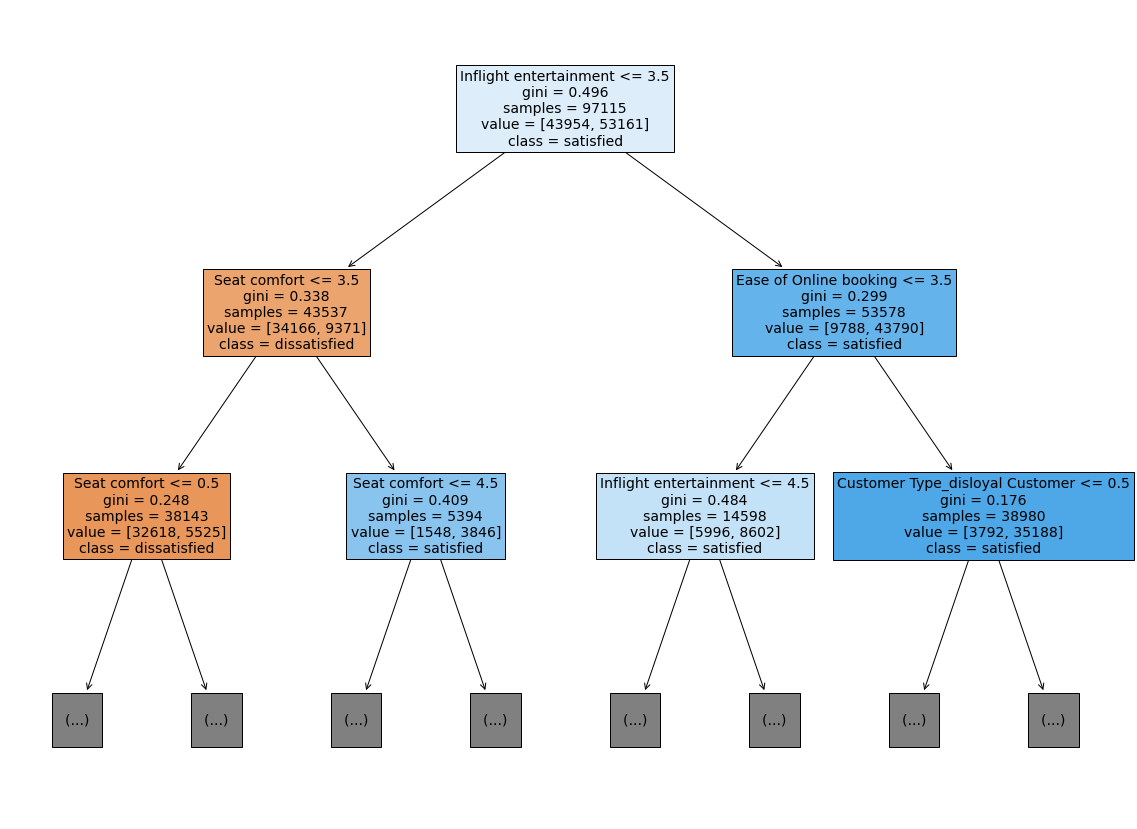

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(decision_tree, max_depth = 2, fontsize=14, feature_names = X.columns,
         class_names = {0: 'dissatisfied', 1: 'satisfied'}, filled=True)

plt.show()

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [ ]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set.

**Note:** This cell may take up to 15 minutes to run.

In [ ]:
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

clf = GridSearchCV(tuned_decision_tree,
                  tree_para,
                  scoring = scoring,
                  cv = 5,
                  refit = 'f1')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

**Question:** How can you determine the best combination of values for the hyperparameters?

By using the best estimator in order to discover the best pair combination.

### Compute the best combination of values for the hyperparameters

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Question:** What is the best combination of values for the hyperparameters?

The best combination of values for the hyperparameters shows a max depth of 16, a min samples leaf of 8 and a min samples split of 2.

<strong> Question: What was the best average validation score? </strong>

In [ ]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9437


The F1-score is slightly better than the baseline model's F1 score (0.939).

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways.

In [ ]:
### YOUR CODE HERE

results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):

    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [ ]:
result_table = make_results("Tuned Decision Tree", clf)

In [ ]:
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.943673,0.935216,0.952305,0.938887


**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

As the F1-score for this new model (0.943) is not significantly better than the baseline model's F1-score (0.939), the additional performance improvement from hyperparameter tuning didn't make a meaningful difference.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

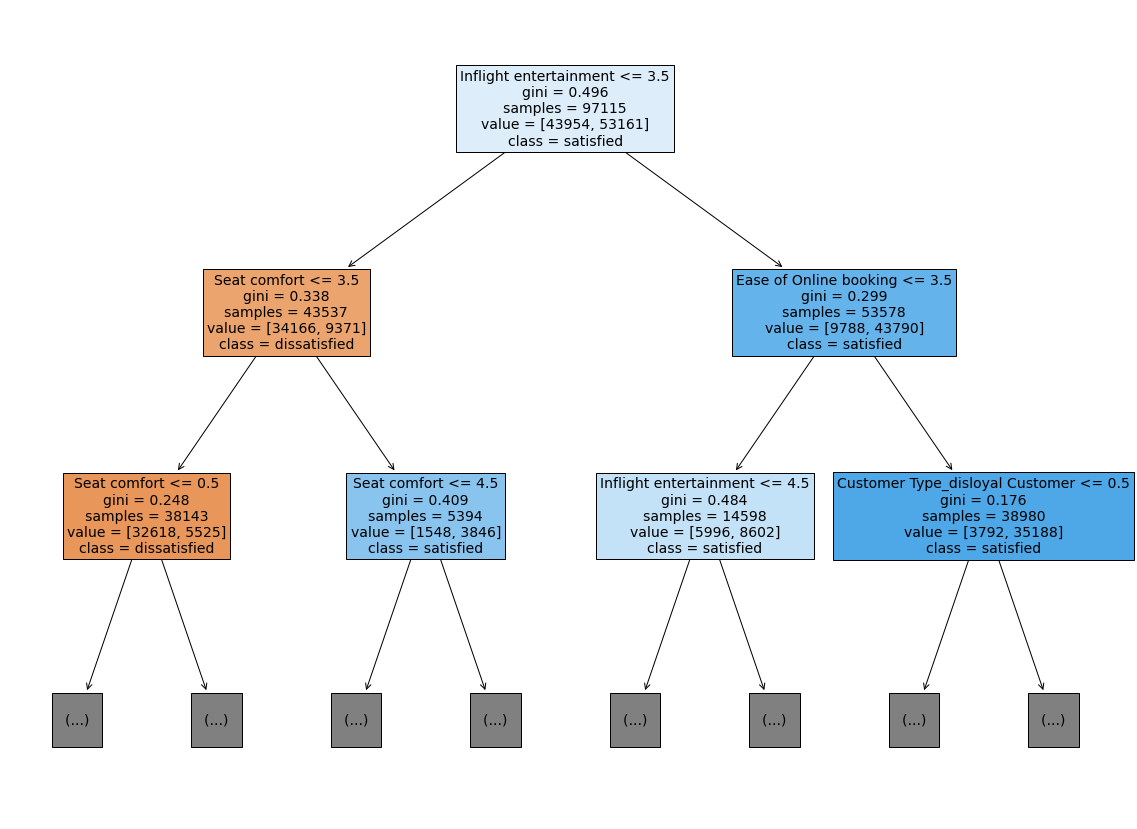

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(clf.best_estimator_, max_depth = 2, fontsize=14, feature_names = X.columns,
         class_names = {0: 'dissatisfied', 1: 'satisfied'}, filled=True)

plt.show()

The decision tree model identifies key factors influencing customer satisfaction with an airline. The root node highlights `Inflight entertainment` as the most critical feature, with a threshold value of 3.5 separating satisfied and dissatisfied customers. This indicates that passengers who rate inflight entertainment higher than 3.5 are more likely to be satisfied. Following this, `Seat comfort` emerges as another pivotal factor for dissatisfied customers, as passengers who rate it below 3.5 are predominantly dissatisfied. On the satisfied side, `Ease of online booking` is an essential criterion, emphasizing that a positive booking experience contributes significantly to satisfaction levels.

The tree also demonstrates nuanced interactions between features. For instance, among dissatisfied passengers, those rating `Seat comfort` extremely low (below 0.5) are the largest subgroup of dissatisfaction. Similarly, for satisfied passengers, a high score in `Customer Type_disloyal Customer` (indicating loyalty) is strongly correlated with satisfaction, signifying the importance of customer retention and loyalty programs. Overall, the tree effectively prioritizes features that airlines can target to enhance satisfaction, such as improving inflight entertainment, seat comfort, and online booking experiences while fostering customer loyalty.

Next, in order to improve the recommendations, the most important features will be identified.

In [ ]:
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

forest_importances

forest_importances_df = forest_importances.reset_index()

forest_importances_df.columns = ['feature', 'score']

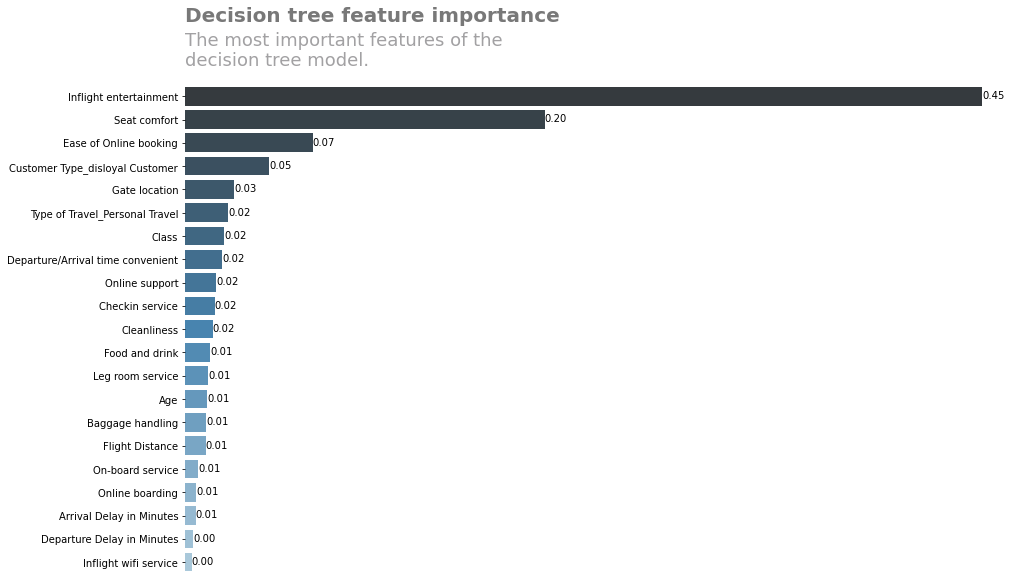

In [ ]:
# defining some colors
GREY1, GREY2, GREY3= "#CFCDCE", "#A2A1A3", "#787878"

# plotting the bar chart
fig, ax = plt.subplots(figsize= (15,9))
n_plots = 21
palette = sns.color_palette("Blues_d", n_colors=n_plots)
palette.reverse()
with palette:
  ax = sns.barplot(y='feature' ,x='score', data=forest_importances_df)
  # plotar título
  plt.text(0, -3.2, 'Decision tree feature importance',
          fontsize=20,
          color=GREY3,
          weight='bold')

  # plotar subtitulo
  plt.text(0, -2.8,
          "The most important features of the \n"
          "decision tree model.",
          verticalalignment="top",
          fontsize=18,
          color=GREY2)

  initialx=0

  #remover grid
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  #remover titulos
  ax.set_ylabel('')
  ax.set_xlabel('')

  plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

  #adicionar labels
  for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,'{:.2f}'.format(p.get_width()))
    initialx+=1
  plt.show()

The feature importance plot emphasizes key drivers of customer satisfaction for the airline. `Inflight entertainment` is the most influential factor, reflecting its substantial impact on passenger experiences. `Seat comfort` ranks second, highlighting the significance of physical comfort during flights. `Ease of online booking` and `Customer Type_disloyal Customer` also play noteworthy roles, suggesting that convenience and customer loyalty influence satisfaction. Other features have minimal or no importance, indicating that focusing on entertainment, comfort, and seamless booking experiences is essential for improving overall satisfaction.

## Conclusion

**What findings would you share with others?**

The results of the decision tree indicate that the model is effective at minimizing both types of errors while maintaining high precision and recall, accuratelly 92% of satisfied customers and 94% of dissatisfied ones. It maintains low error rates with 7.7% false positives and 5.9% false negatives.

In addition, the following findings regarding feature importance stood out:
* **Inflight Entertainment:** The most critical factor influencing customer satisfaction. A threshold rating of 3.5 separates satisfied and dissatisfied passengers, with higher ratings leading to satisfaction.

* **Seat Comfort:** A pivotal factor for dissatisfaction. Ratings below 3.5 indicate dissatisfaction, with extremely low ratings (below 0.5) forming the largest subgroup of dissatisfied customers.

* **Ease of Online Booking:** An essential criterion for satisfaction. A positive booking experience significantly enhances satisfaction levels.

* **Customer Loyalty:** High loyalty scores strongly correlate with satisfaction, highlighting the importance of customer retention programs.

* **Feature Importance Insights:** The most impactful features are inflight entertainment, seat comfort, ease of online booking, and customer loyalty, while other features have minimal influence.

**What would you recommend to stakeholders?**

* **Prioritize Inflight Entertainment:** As the most critical factor influencing satisfaction, the company should focus on improving the inflight entertainment experience, ensuring it meets or exceeds a rating of 3.5 to enhance passenger satisfaction.

* **Enhance Seat Comfort:** Improving seat comfort is crucial, especially for dissatisfied customers. Addressing low seat comfort ratings (below 0.5) could significantly reduce dissatisfaction.

* **Improve Online Booking Experience:** A smooth and easy online booking process is a key factor in ensuring customer satisfaction. Optimizing this experience will likely increase positive ratings from satisfied passengers.

* **Foster Customer Loyalty:** Loyalty programs are essential, as customers who identify as loyal (even if disloyal) show higher satisfaction. Focusing on customer retention through targeted loyalty initiatives can boost overall satisfaction.

* **Focus on Key Features:** Based on the feature importance plot, resources should be focused on inflight entertainment, seat comfort, and online booking, as these have the most significant impact on passenger satisfaction. Features with minimal importance can be deprioritized.

* **Focus on Enhancing Predictive Models:** Given the strong performance of the model in predicting customer satisfaction, the company should prioritize further development and optimization of similar models to improve overall understanding of customer experiences.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged